# LQ earnings vs LQ house price vs waiting List

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import autocorrelation_plot


In [44]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)
homeless = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=5, skiprows = 1)

homeless = homeless.drop(homeless.iloc[:,2:6], axis=1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=6)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)

merged_all = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)
merged_all = merged_all.drop(merged.iloc[:, :0], axis=1)


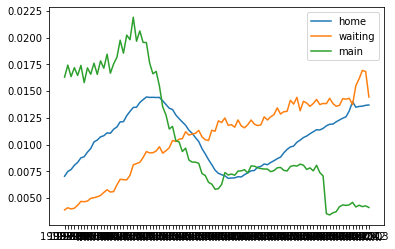

In [45]:
# quarterly data on homelessness and the waiting list
df = pd.read_excel (r"Data/all_in_one_Time_sieries_data_color.xlsx", sheet_name=3, skiprows = 1)
homeless1 = df.iloc[0:, 3]
homeless1_norm = [float(i)/sum(homeless1) for i in homeless1]

ta = df.iloc[0:, 4]
ta_norm = [float(i)/sum(ta) for i in ta]

main = df.iloc[0:, 5]
main_norm =  [float(i)/sum(main) for i in main]

plt.plot(df.iloc[0:, 2], homeless1_norm, label = "home")
plt.plot(df.iloc[0:, 2], ta_norm, label = "waiting")
plt.plot(df.iloc[0:, 2], main_norm, label = "main")
plt.legend()




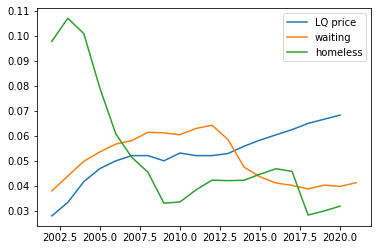

In [107]:
# plot normalised LQ price vs waiting List for correlated timescale only
priceCol = list(price.iloc[0])[2:]
price_norm = [float(i)/sum(priceCol) for i in priceCol]

homelessCol = list(homeless.iloc[0])[2:]
homeless_norm = [float(i)/sum(homelessCol) for i in homelessCol]

waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]

plt.plot(list(price.columns)[2:], price_norm, label = "LQ price")
plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.plot(list(homeless.columns)[2:], homeless_norm, label = "homeless")
plt.legend()

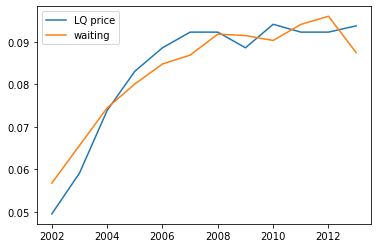

In [108]:
# plot normalised LQ price vs waiting List
endIndex = 14 # until 2013 inc.
priceCol = list(price.iloc[0])[2:endIndex]
price_norm = [float(i)/sum(priceCol) for i in priceCol]
waitingCol = list(waiting.iloc[0])[2:endIndex]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]

plt.plot(list(price.columns)[2:endIndex], price_norm, label = "LQ price")
plt.plot(list(waiting.columns)[2:endIndex], waiting_norm, label = "waiting")
plt.legend()

In [109]:
# pearson's r computed using Pandas and Scipy
overall_pearson_r = merged.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged.dropna()['waiting'], merged.dropna()['homeless'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.40419041277632484
Scipy computed Pearson r: -0.40419041277632484 and p-value: 0.05576506254058324


In [110]:
# pearson's r computed using Pandas and Scipy for correlated timescale only
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2.dropna()['waiting'], merged2.dropna()['homeless'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.28650736292595275
Scipy computed Pearson r: -0.2865073629259528 and p-value: 0.2820056946446844


In [111]:
# pearson's r computed using Pandas and Scipy for correlated timescale only + homelessness
overall_pearson_r = merged_all.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged_all.dropna()['waiting'], merged_all.dropna()['homeless'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.3601905036216173
Scipy computed Pearson r: -0.1786734964491836 and p-value: 0.4642494362475896


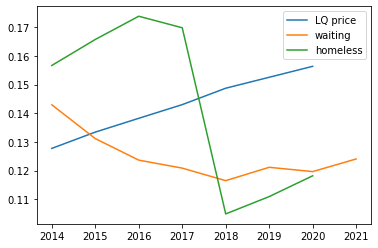

In [112]:
# plot normalised LQ price vs waiting List + homeless after 2012
endIndex = 14 # until 2013 inc.
priceCol = list(price.iloc[0])[endIndex:]
price_norm = [float(i)/sum(priceCol) for i in priceCol]

homelessCol = list(homeless.iloc[0])[endIndex:]
homeless_norm = [float(i)/sum(homelessCol) for i in homelessCol]

waitingCol = list(waiting.iloc[0])[endIndex:]
waiting_norm = [float(i)/sum(waitingCol) for i in waitingCol]

plt.plot(list(price.columns)[endIndex:], price_norm, label = "LQ price")
plt.plot(list(waiting.columns)[endIndex:], waiting_norm, label = "waiting")
plt.plot(list(homeless.columns)[endIndex:], homeless_norm, label = "homeless")
plt.legend()

In [113]:

merged4 = merged_all.drop(merged.index[range(0,11)])
overall_pearson_r = merged4.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged4.dropna()['waiting'], merged4.dropna()['homeless'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.8078125988621696
Scipy computed Pearson r: 0.355425676811337 and p-value: 0.3875748251785561
